# Deep Learning Generativo

* **IA funciona bien para tareas creativas** (no solo tareas pasivas como reconocimiento de objetos o tareas reactivas como conducir un automóvil)
* 2015 algoritmo DeepDream de Google. 2016 primeras apps para convertir fotos en pinturas de varios estilos. Verano de 2016, se dirige un cortometraje, Sunspring, utilizando un guión escrito por Long Short-Term Memory. Música generada por una red neuronal....
* No se trata de reemplazar nuestra propia inteligencia con otra cosa, se trata de potenciar la nuestra con la IA -> **Inteligencia Aumentada**.
* Una gran parte de la **creación artística** consiste en el **reconocimiento de patrones** simples y **aplicar una habilidad técnica**. 
* Nuestra **percepción**, nuestro **lenguaje** y nuestras **obras de arte** tienen una **estructura estadística**. Aprender esta estructura es en lo que se destacan los algoritmos de deep learning. 
* Aprenden el **espacio estadístico** de **imágenes**, **música** e **historias**, y luego pueden tomar **muestras de este espacio**, **creando nuevas obras de arte con características similares** a las que el modelo ha visto en sus datos de entrenamiento. 
* **El muestreo no es un acto de creación artística en sí mismo**. Es **una mera operación matemática**: el algoritmo no se basa en la vida humana, las emociones humanas o nuestra experiencia del mundo
* Es sólo **nuestra interpretación, como espectadores humanos**, la que **dará sentido a lo que genera el modelo**. 
* El **muestreo del espacio estadístico** puede convertirse en un **pincel que empodere al artista**, aumenta sus posibilidades creativas y expande el espacio de lo que podemos imaginar. 
* Puede hacer que la creación artística sea más accesible al eliminar la necesidad de habilidad técnica y práctica, estableciendo un nuevo medio de expresión pura, **diferenciando el arte de la artesanía**.
* Exploraremos desde varios ángulos el **potencial del aprendizaje profundo para aumentar la creación artística**. Revisaremos la **generación de datos de secuencia** (que se puede usar para generar texto o música), **DeepDream y la generación de imágenes** utilizando codificadores automáticos variacionales y **redes antagónicas generativas**.

## Generación de Texto

* Exploraremos cómo se pueden **usar las RNN para generar datos de secuencia**. Usaremos **texto**, pero se pueden usar **notas musicales** para generar nueva música,  series temporales de datos de **pinceladas** para generar pinturas trazo a trazo, y así sucesivamente. 
* Se aplica también a la **síntesis de voz** y a la **generación de diálogos para chatbots**. La función **Smart Reply** que Google lanzó en 2016, capaz de generar automáticamente una selección de respuestas rápidas a correos electrónicos o mensajes de texto, funciona con técnicas similares.

### Una breve historia del aprendizaje profundo generativo para la generación de secuencias

* **Alex Graves "Generar datos secuenciales es lo más cerca que las computadoras llegan a soñar"**. "Generación de secuencias con redes neuronales recurrentes", arXiv (2013), https://arxiv.org/abs/1308.0850
* 2017-2018, la **arquitectura Transformer sobrepasó a las RNNs** en **tareas supervisadas de PLN** y **modelos de secuencia generativa**: **modelado de lenguaje** (generación de texto a nivel de palabra).**El ejemplo más conocido de un Transformador generativo sería GPT-3**, un modelo de **generación de texto de 175 mil millones de parámetros** entrenado por OpenAI.

### ¿Cómo se generan datos secuenciales?

* La **forma de generar datos secuenciales** es **entrenar un modelo** (**Transformer** o **RNNs**) **para predecir el próximo token** o los próximos tokens en una secuencia, **utilizando los tokens anteriores como entrada** (dada la entrada "el gato está en el", el modelo está entrenado para predecir "tapete" como siguiente palabra)
* Cualquier **red que pueda modelar la probabilidad del siguiente token** dados los anteriores se denomina **modelo de lenguaje**.
* Un **modelo de lenguaje captura la estructura estadística del mismo**. Una vez entrenado, puede **muestrearlo** (**generar nuevas secuencias**): se alimenta con una cadena inicial de texto (llamados **datos de acondicionamiento**), **genera el siguiente token**, **vuelva a agregar la salida generada a los datos de entrada y repita el proceso muchas veces**

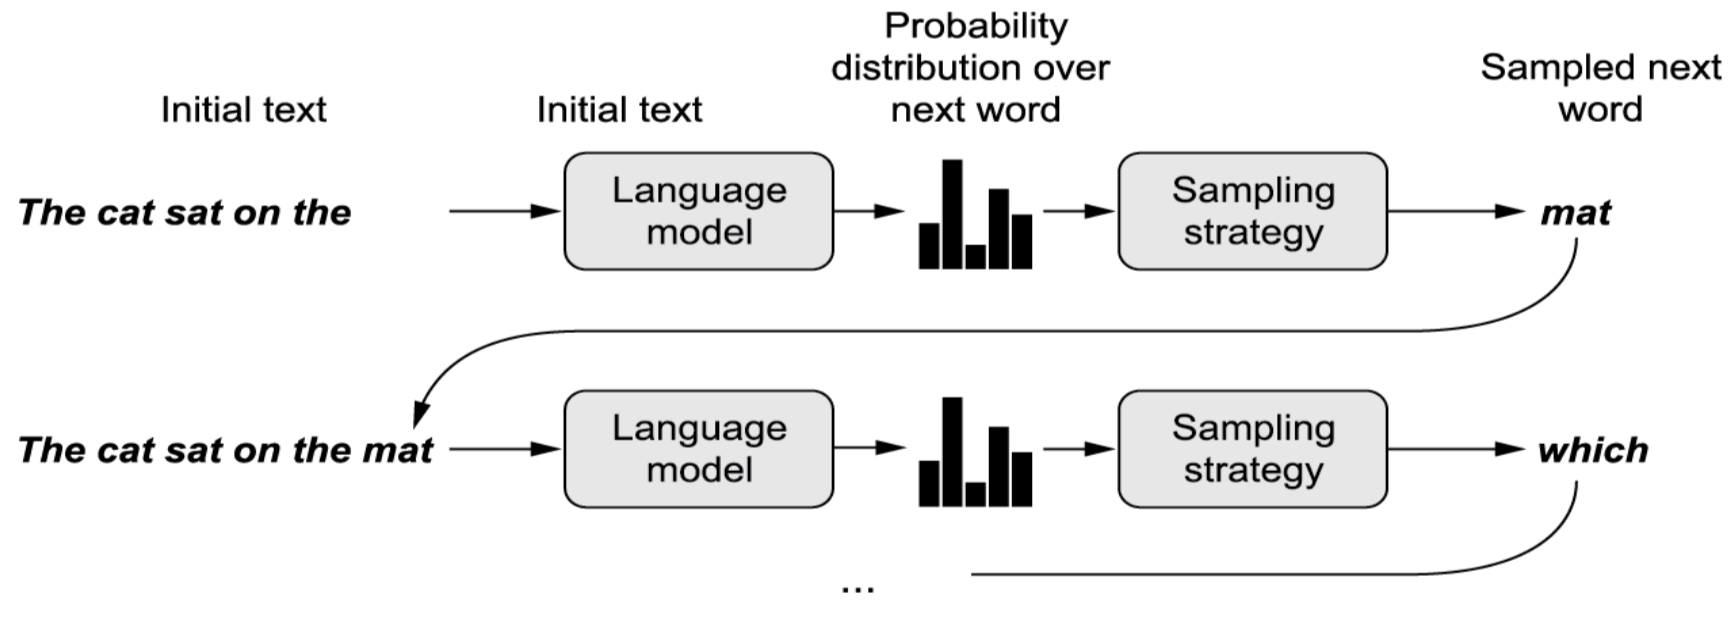

### La importancia de la estrategia de muestreo (sampling strategy)

* Al **generar texto**, es muy **importante la forma en que elige el siguiente token**. 
* Enfoque **muestreo codicios**o (ingenuo): **elegir siempre el siguiente carácter más probable**. Resultado: **cadenas repetitivas** y **predecibles** que **no parecen lenguaje coherente**. 
* Enfoque de **muestreo estocástico**: **introduce aleatoriedad en el proceso de muestreo** mediante el **muestreo en función de la distribución de probabilidad**. **Resultados más sorprendentes**: si una palabra tiene una probabilidad de 0,3 de ser la siguiente en la oración según el modelo, la elegirá el 30 % de las veces.
* Un ejemplo de este segundo caso es **el muestreo probabilístico de la salida softmax**: permite que **incluso las palabras poco probables se muestreen algunas veces**, generando oraciones que parecen más interesantes y, a veces, **muestran creatividad al generar oraciones nuevas que suenan realistas** que no ocurrieron en los datos de entrenamiento. **Problema** de esta estrategia: **no podemos controlar la cantidad de aleatoriedad en el proceso de muestreo**.
* Tanto la **aleatoreidad 0** (**muestreo codicioso y entropía mínima** -> secuencias generadas con una estructura **más predecible** y un aspecto potencialmente **más realista**) como la **absoluta** (**entropía máxima** -> secuencias generadas **más sorprendentes y creativas**) no producen nada interesante. **Softmax** (muestreo de la **distribución de probabilidad "real"**) es un **punto intermedio** entre estos dos extremos.
* Hay que **explorar diferentes grados de aleatoriedad** en el proceso de generación, siendo nosotros, **los humanos, los jueces** finales de cuán interesantes son los datos generados.
* El interés es altamente **subjetivo**, y **no se sabe de antemano dónde se encuentra el punto de entropía óptima**. (DALL-E)
* Para **controlar la cantidad de estocasticidad en el proceso de muestreo**, introduciremos un **parámetro** llamado **temperatura softmax**, que caracteriza la **entropía de la distribución de probabilidad** utilizada para el muestreo: caracteriza **cuán sorprendente o predecible será la elección de la siguiente palabra**.
* Dado un valor de temperatura, se calcula una nueva distribución de probabilidad a partir de la original (la salida softmax del modelo) al reponderarla de la siguiente manera:

**Reponderación de una distribución de probabilidad a una temperatura diferente**

In [ ]:
import numpy as np
# original_distribution es una matriz 1D NumPy de valores de 
# probabilidad que deben sumar 1. La temperatura es un factor 
# que cuantifica la entropía de la distribución de salida.
def reweight_distribution(original_distribution, temperature=0.5):
    distribution = np.log(original_distribution) / temperature
    distribution = np.exp(distribution)
    # Devuelve una versión reponderada de la distribución original. 
    # Es posible que la suma de la distribución ya no sea 1, por lo 
    # que la dividiremos por su suma para obtener la nueva distribución
    return distribution / np.sum(distribution)

Las **temperaturas más altas dan como resultado distribuciones de muestreo de mayor entropía** que generarán datos generados más sorprendentes y no estructurados, mientras que una **temperatura más baja dará como resultado menos aleatoriedad y datos generados mucho más predecibles**

**Diferentes reponderaciones de una distribución de probabilidad. Baja temperatura = más determinista, alta temperatura = más aleatoria**.

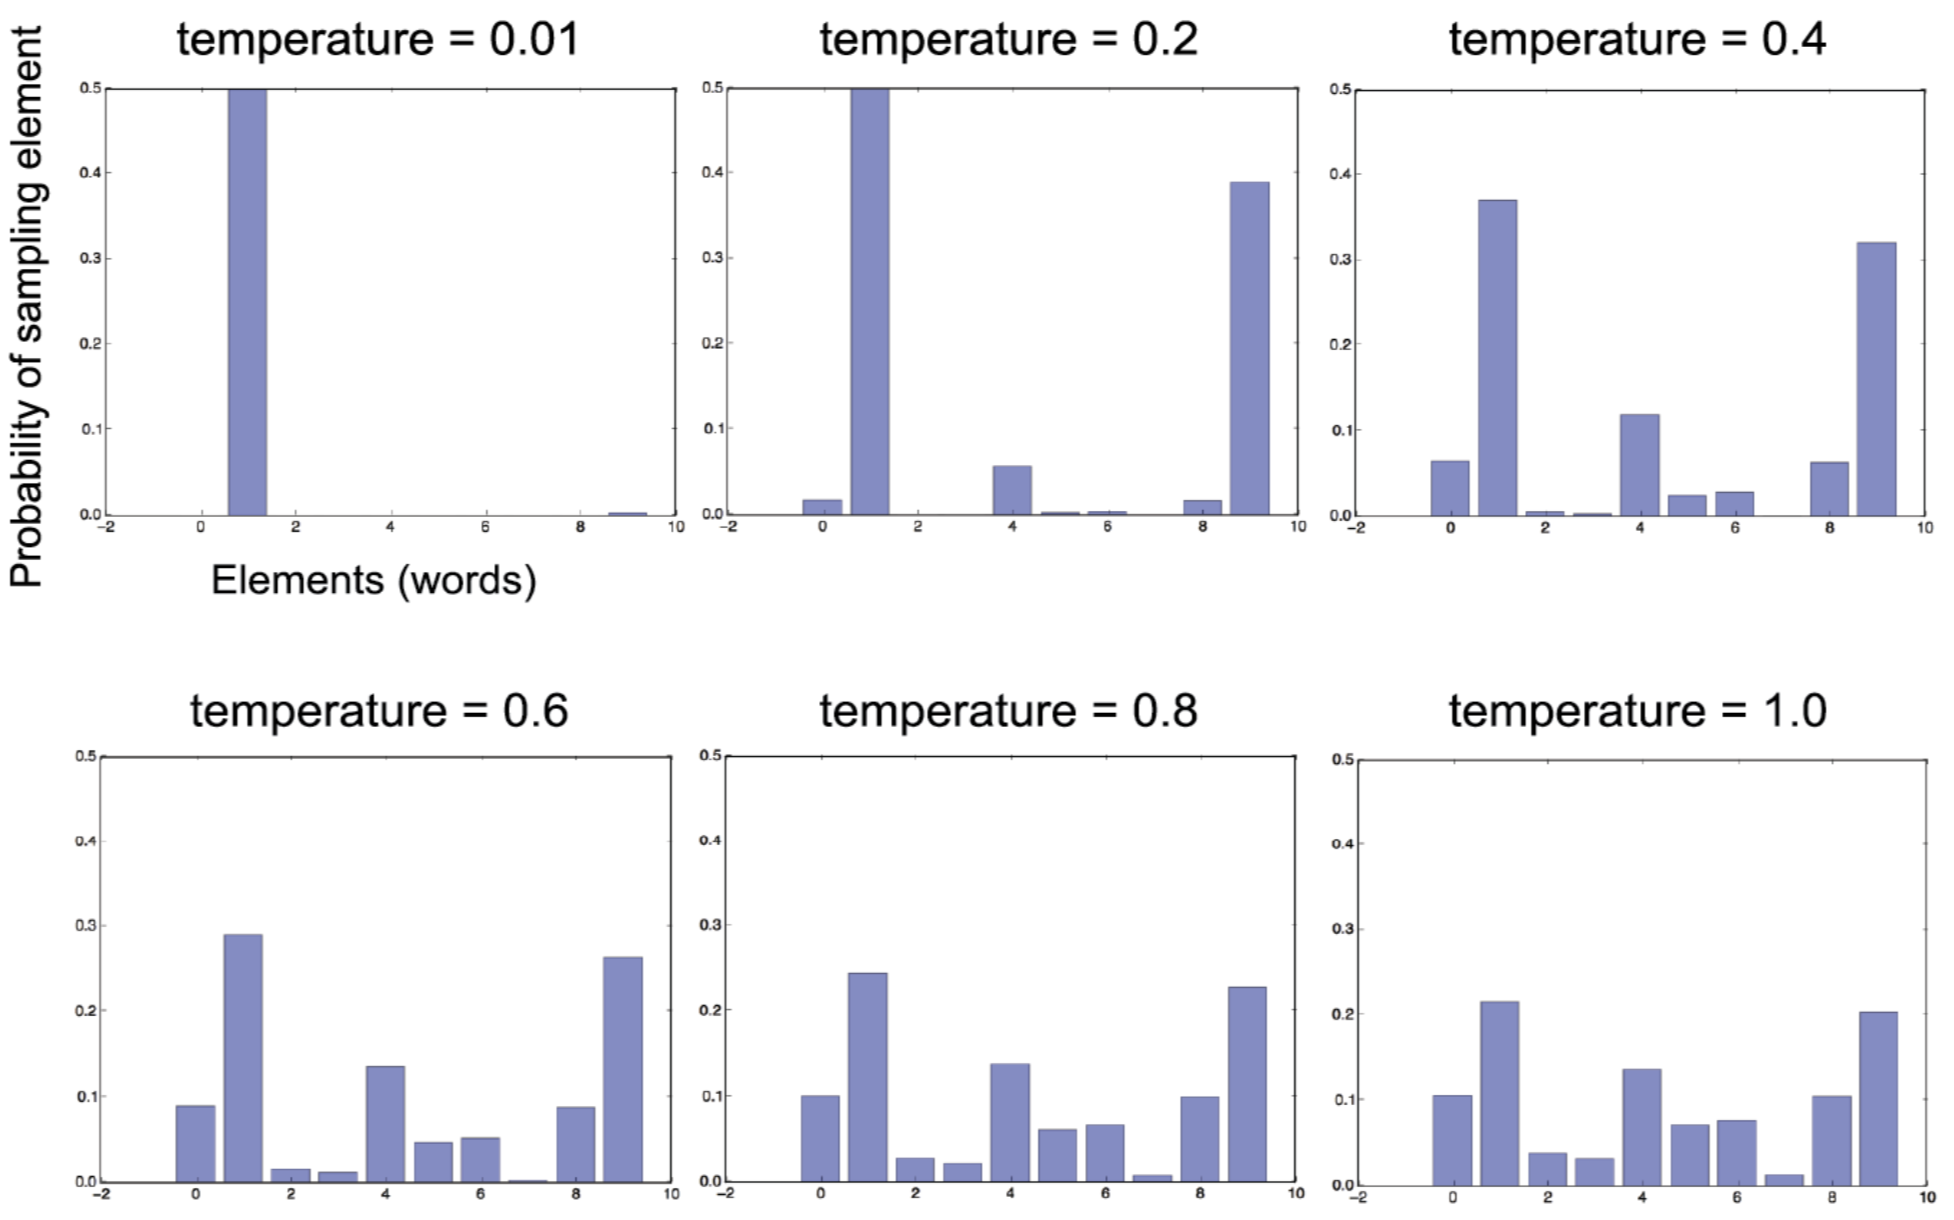

### Implementando generación de texto con Keras

* Pondremos estas **ideas en práctica con Keras**. 
* Necesitamos **gran cantidad de datos de texto que usaremos para aprender un modelo de lenguaje** (cualquier archivo de texto o conjunto de archivos de texto lo suficientemente grande: Wikipedia, El señor de los anillos, etc.) 
* Nosotros **usaremos las reseñas de películas de IMDB** y **aprenderemos a generar reseñas de películas** que **no han existido nunca**
* Por lo tanto, **nuestro modelo de lenguaje será un modelo del estilo y los temas de estas reseñas de películas**, en lugar de un modelo general del idioma inglés.

#### Preparando los datos

**Descargando y descomprimiendo el conjunto de datos de reseñas de películas de IMDB**

In [ ]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

--2023-03-12 12:07:05--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  35.4MB/s    in 2.3s    

2023-03-12 12:07:07 (35.4 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



Como siempre,  **obtenemos una carpeta llamada aclImdb** que contiene dos subcarpetas, una para reseñas de películas con opiniones negativas y otra para reseñas con opiniones positivas. **Hay un archivo de texto por revisión**. Llamaremos a **``text_dataset_ from_directory`` con ``label_mode=None`` para crear un conjunto de datos que lea estos archivos y produzca el contenido de texto de cada archivo**.

**Creando un conjunto de datos a partir de archivos de texto (un archivo = una muestra)**

In [ ]:
import tensorflow as tf
from tensorflow import keras
dataset = keras.utils.text_dataset_from_directory(
    directory="aclImdb", label_mode=None, batch_size=256)
# Quitamos la etiqueta HTML que aparece en muchas de las reseñas.   
# Esto no importaba mucho para la clasificación del texto, pero no  
# querríamos generar etiquetas en este ejemplo!
dataset = dataset.map(lambda x: tf.strings.regex_replace(x, "<br />", " "))

Found 100006 files belonging to 1 classes.


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


* Usamos la capa **``TextVectorization`` para calcular el vocabulario** con el que trabajaremos. 
* Solo **usaremos las primeras ``sequence_length`` palabras** de cada crítica.

**Preparando una capa `TextVectorization`**

In [ ]:
from tensorflow.keras.layers import TextVectorization

sequence_length = 100
# Solo consideraremos las 15.000 palabras más comunes; 
# cualquier otra cosa se tratará como el token fuera 
# del vocabulario, "[UNK]".
vocab_size = 15000
text_vectorization = TextVectorization(
    max_tokens=vocab_size,
    # Queremos devolver secuencias de índice 
    # de palabras con valores enteros
    output_mode="int",
    # Trabajaremos con entradas y objetivos de longitud 
    # 100 (pero como compensaremos los objetivos en 1, 
    # el modelo verá secuencias de longitud 99).
    output_sequence_length=sequence_length,
)
text_vectorization.adapt(dataset)

Usamos la capa ``TextVectorization`` para crear un conjunto de datos de modelado de lenguaje donde las muestras de entrada son textos vectorizados y los objetivos correspondientes son los mismos textos compensados ​​por una palabra.

**Configurando un conjunto de datos de modelado de lenguaje**

In [ ]:
def prepare_lm_dataset(text_batch):
    # Convertimos un lote de textos (cadenas) 
    # en un lote de secuencias enteras.
    vectorized_sequences = text_vectorization(text_batch)
    # Creamos entradas cortando la última palabra de las secuencias
    x = vectorized_sequences[:, :-1]
    # Creamos objetivos compensando las secuencias por 1.
    y = vectorized_sequences[:, 1:]
    return x, y

lm_dataset = dataset.map(prepare_lm_dataset, num_parallel_calls=4)

#### Un modelo de secuencia-a-secuencia basado en Transformers

* **Entrenaremos** un modelo para **predecir una distribución de probabilidad sobre la siguiente palabra en una oración**, dado un número de palabras iniciales. 
* Cuando el modelo esté entrenado, lo **alimentaremos con un mensaje**, **probaremos la siguiente palabra**, **agregaremos esa palabra nuevamente al mensaje y repetiremos**, **hasta que hayamos generado un párrafo corto**. 
* Un modelo que **trate cada secuencia como una muestra independiente tendría que hacer mucho trabajo redundante**, recodificando varias veces subsecuencias que ha visto antes en gran medida (Como vimos en el uso de deep learning en series temporales, **las secuencias se cortaban y se superponían con cierto decalaje**, para la frase “A complete sentence must have, at minimum, three things: a subject, verb, and an object”):
  * “A complete sentence must”
  * “complete sentence must have”
  * “sentence must have at”
  * y así hasta... “verb and an object”
* Por otro lado el modelo **solo aprendería a producir predicciones cuando N palabras estuvieran disponibles**, pero **sería útil poder comenzar a predecir con menos de N palabras**. De lo contrario, nos veríamos obligados a usar solo frases relativamente largas (en nuestra implementación, N = 100 palabras)
* Anteriormente **esto no fue un gran problema, porque no teníamos tantas muestras de entrenamiento**
* Podríamos tratar de **aliviar este problema de redundancia** usando **strides** (zancadas) para **muestrear nuestras secuencias**, **saltando algunas palabras entre dos muestras consecutivas**. Pero eso **reduciría nuestras muestras de entrenamiento** y solo proporcionaría una **solución parcial**.
* Para **solucionar estos problemas**, utilizaremos un **modelo de secuencia-a-secuencia**: introduciremos secuencias de **N** palabras (**indexadas de 0 a N**) en nuestro modelo, y **predeciremos la secuencia desplazada por uno (de 1 a ``N + 1``)**. 
* Usaremos el enmascaramiento causal (**causal masking**) para asegurarnos de que, **para cualquier ``i``, el modelo solo usará palabras de 0 a ``i`` para predecir la palabra ``i + 1``**. 
* De esta forma estamos **entrenando simultaneamente el modelo** para resolver:
  * Devolver la palabra N +1 teniendo de 0 a N 
  * Predecir las siguientes palabras dada una secuencia de ``1 <= i <= N`` palabras anteriores. 
En el momento de la generación, incluso si solo solicitamos al modelo una sola palabra, podrá brindarnos una distribución de probabilidad para las siguientes palabras posibles.


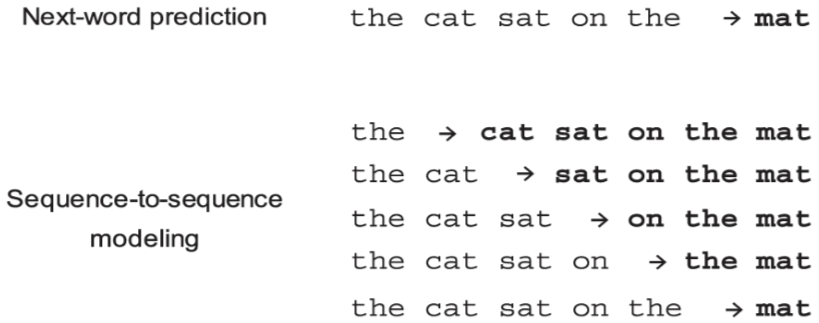

* Un **modelo secuencia-a-secuencia** **también lo podríamos haber hecho en el problema de predicción de temperaturas** de la lección de series temporales (dada una secuencia de 120 puntos (temperaturas) de datos por hora, aprenda a generar una secuencia de 120 temperaturas con un offset (decalaje) de 24 horas en el futuro. Estaría resolviendo el problema inicial mas los 119 problemas relacionados con el pronóstico de la temperatura en 24 horas, dado 1 <= i < 120 puntos de datos horarios anteriores). 
* Si lo **intentamos con RNN en una configuración de secuencia-a -secuencia**, obtendríamos **resultados similares pero progresivamente peores**, porque **la restricción de resolver estos 119 problemas adicionales** relacionados con el mismo modelo **interfiere** ligeramente **con el tarea que realmente nos importa**. 
* Vamos a hacerlo sobre la **configuración para el aprendizaje de secuencia-a-secuencia** en el caso general: **alimentamos la secuencia de origen en un codificador y luego alimentamos tanto la secuencia codificada (la salida del codificador) como la secuencia de destino (los tokens ya generados) en un decodificador que intenta predecir la misma secuencia objetivo desplazada por un paso**. 
* Cuando estamos **generando texto, no hay una secuencia de origen**: **solo estamos tratando de predecir los siguientes tokens en la secuencia de destino dados los tokens anteriores, lo que podemos hacer usando solo el decodificador**. Y gracias al **relleno causal**, el **decodificador solo observará las palabras ``0...N`` para predecir la palabra ``N + 1``**.

Implementamos nuestro modelo: vamos a **reutilizar los componentes básicos que creamos en la lección anterior: ``PositionalEmbedding`` y ``TransformerDecoder``**.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=input_dim, output_dim=output_dim)
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim)
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)

    def get_config(self):
        config = super(PositionalEmbedding, self).get_config()
        config.update({
            "output_dim": self.output_dim,
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,
        })
        return config


class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
          num_heads=num_heads, key_dim=embed_dim)
        self.attention_2 = layers.MultiHeadAttention(
          num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True

    def get_config(self):
        config = super(TransformerDecoder, self).get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1),
             tf.constant([1, 1], dtype=tf.int32)], axis=0)
        return tf.tile(mask, mult)

    def call(self, inputs, encoder_outputs, mask=None):
        causal_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            padding_mask = tf.cast(
                mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, causal_mask)
        else:
            padding_mask = mask
        attention_output_1 = self.attention_1(
            query=inputs,
            value=inputs,
            key=inputs,
            attention_mask=causal_mask)
        attention_output_1 = self.layernorm_1(inputs + attention_output_1)
        attention_output_2 = self.attention_2(
            query=attention_output_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
        )
        attention_output_2 = self.layernorm_2(
            attention_output_1 + attention_output_2)
        proj_output = self.dense_proj(attention_output_2)
        return self.layernorm_3(attention_output_2 + proj_output)

**Un modelo de lenguaje simple basado en Transformer**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

embed_dim = 256
latent_dim = 2048
num_heads = 2
# De ejemplo
sequence_length = 20
vocab_size = 15000

inputs = keras.Input(shape=(None,), dtype="int64")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(inputs)
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(x, x)
# Softmax sobre posibles palabras de vocabulario, 
# calculado para cada timestep de secuencia de salida.
outputs = layers.Dense(vocab_size, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop")

### Un callback de generación de texto con muestreo de temperatura variable

* Usaremos un **callback para generar texto usando un rango de temperaturas diferentes después de cada epoch**. Esto nos permite **ver cómo evoluciona el texto generado a medida que el modelo comienza a converger**, así como el **impacto de la temperatura en la estrategia de muestreo**. 
* Para **iniciar (seed) la generación de texto, usaremos el indicador "this movie"**: todos nuestros textos generados comenzarán con ese indicador.

**Un callback de generación de texto**

In [ ]:
import numpy as np

# Dict (diccionario) que asigna o mapea índices de palabras 
# a cadenas, para usarlos para decodificar texto
tokens_index = dict(enumerate(text_vectorization.get_vocabulary()))

# Implementa el muestreo de variable-temperatura 
# a partir de una distribución de probabilidad
def sample_next(predictions, temperature=1.0):
    predictions = np.asarray(predictions).astype("float64")
    predictions = np.log(predictions) / temperature
    exp_preds = np.exp(predictions)
    predictions = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, predictions, 1)
    return np.argmax(probas)

class TextGenerator(keras.callbacks.Callback):
    def __init__(self,
                 # Indicación o prompt que usamos para 
                 # iniciar la generación de texto
                 prompt,
                 # Cuantas palabras generar
                 generate_length,
                 model_input_length,
                 # Rango de temperaturas 
                 # a usar para el muestreo
                 temperatures=(1.,),
                 print_freq=1):
        self.prompt = prompt
        self.generate_length = generate_length
        self.model_input_length = model_input_length
        self.temperatures = temperatures
        self.print_freq = print_freq
        vectorized_prompt = text_vectorization([prompt])[0].numpy()
        self.prompt_length = np.nonzero(vectorized_prompt == 0)[0][0]

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.print_freq != 0:
            return
        for temperature in self.temperatures:
            print("== Generating with temperature", temperature)
            # Al generar texto, comenzamos 
            # desde nuestro prompt o aviso.
            sentence = self.prompt
            for i in range(self.generate_length):
                # Alimentamos nuestro modelo con la secuencia actual
                tokenized_sentence = text_vectorization([sentence])
                predictions = self.model(tokenized_sentence)
                # Recuperamos las predicciones del último timestep y las 
                # utilizamos para muestrear o probar una nueva palabra.
                next_token = sample_next(
                    # O [0, i, :]
                    predictions[0, self.prompt_length - 1 + i, :]
                )
                sampled_token = tokens_index[next_token]
                # Agregamos la nueva palabra a 
                # la secuencia actual y repetimos
                sentence += " " + sampled_token
            print(sentence)

prompt = "This movie"
text_gen_callback = TextGenerator(
    prompt,
    generate_length=50,
    model_input_length=sequence_length,
    # Usaremos un rango diverso de 
    # temperaturas para muestrear texto, 
    # para demostrar el efecto de la 
    # temperatura en la generación de texto.
    temperatures=(0.2, 0.5, 0.7, 1., 1.5))

**Ajustando el modelo de lenguaje**

In [ ]:
model.fit(lm_dataset, epochs=200, callbacks=[text_gen_callback])

Epoch 1/200
391/391 [==============================] - ETA: 0s - loss: 5.8881== Generating with temperature 0.2
This movie is a friend there are not really doubles fear they have really know fulci and scripted of gwyneth yourself a stumble to the realistic idea that gary preposterous even more though i looked like reborn glued to theyd feature lets think he played if you are biker performance are with
== Generating with temperature 0.5
This movie is great takes a bell one of sht its low budget on a few different but not caught up the external a willing to go and churned between italy the traditional woman antics by their characters or and mrs [UNK] and the life of most sticks by he goes in
== Generating with temperature 0.7
This movie is humanity that matter hand its survivor with anything about destined by a opening fiction force one title stuff the whole movie is captivating the car not so many of which we are onto this stage but some devastating loser proves that but toll use the re

Algunos ejemplos seleccionados de lo que podemos generar después de 200 épocas de entrenamiento. Los signos de puntuación no forma parte de nuestro vocabulario, por lo que ninguno de nuestros textos generados tiene signos de puntuación:

* Con **``temperature=0.2``**
  * “this movie is a [UNK] of the original movie and the first half hour of the movie is pretty good but it is a very good movie it is a good movie for the time period”
  * “this movie is a [UNK] of the movie it is a movie that is so bad that it is a [UNK] movie it is a movie that is so bad that it makes you laugh and cry at the same time it is not a movie i dont think ive ever seen”
* Con **``temperature=0.5``**
  * “this movie is a [UNK] of the best genre movies of all time and it is not a good movie it is the only good thing about this movie i have seen it for the first time and i still remember it being a [UNK] movie i saw a lot of years”
  * “this movie is a waste of time and money i have to say that this movie was a complete waste of time i was surprised to see that the movie was made up of a good movie and the movie was not very good but it was a waste of time and”
* Con **``temperature=0.7``**
  * “this movie is fun to watch and it is really funny to watch all the characters are extremely hilarious also the cat is a bit like a [UNK] [UNK] and a hat [UNK] the rules of the movie can be told in another scene saves it from being in the back of”
  * “this movie is about [UNK] and a couple of young people up on a small boat in the middle of nowhere one might find themselves being exposed to a [UNK] dentist they are killed by [UNK] i was a huge fan of the book and i havent seen the original so it”
* Con **``temperature=1.0``**
  * “this movie was entertaining i felt the plot line was loud and touching but on a whole watch a stark contrast to the artistic of the original we watched the original version of england however whereas arc was a bit of a little too ordinary the [UNK] were the present parent [UNK]”
  * “this movie was a masterpiece away from the storyline but this movie was simply exciting and frustrating it really entertains friends like this the actors in this movie try to go straight from the sub thats image and they make it a really good tv show”
* Con **``temperature=1.5``**
  * “this movie was possibly the worst film about that 80 women its as weird insightful actors like barker movies but in great buddies yes no decorated shield even [UNK] land dinosaur ralph ian was must make a play happened falls after miscast [UNK] bach not really not wrestlemania seriously sam didnt exist”
  * “this movie could be so unbelievably lucas himself bringing our country wildly funny things has is for the garish serious and strong performances colin writing more detailed dominated but before and that images gears burning the plate patriotism we you expected dyan bosses devotion to must do your own duty and another”

* Valor de **temperatura bajo** - **resultado**: texto muy **aburrido y repetitivo** y, a veces, puede hacer que el proceso de generación se atasque en un bucle. 
* Valor de **temperaturas más altas** - **resultado**: texto generado se vuelve más **interesante, sorprendente e incluso creativo**. 
* Valor de temperatura **muy alta** - **resultado**: estructura local comienza a descomponerse y **la salida parece** en gran medida **aleatoria**. 
* Pareque tenemos **buenos resultados** con **temperatura** alrededor de  **0,7**. 
* Un **equilibrio inteligente** entre la **estructura aprendida** y la **aleatoriedad** es lo que** hace que la generación sea interesante**.
* Entrenando un **modelo más grande** y **con más datos**, podemos **lograr muestras generadas** que se ven mucho **más coherentes y realistas** 
* La **salida de un modelo como GPT-3** es un **buen ejemplo de lo que se puede hacer con el lenguaje**. (GPT-3 es exantamente lo mismo que lo que estamos haciendo en este ejemplo, pero c**on una pila profunda de decodificadores Transformer** y un **tamaño de dataset de entrenamiento mucho más grande**). 
* **No esperéis generar nunca ningún texto significativo, que no sea por casualidad y la magia de vuestra propia interpretación**: todo lo que estamos haciendo es **muestrear datos de un modelo estadístico de qué palabras vienen después de qué palabras**. **Los modelos de lenguaje son todo forma y nada de sustancia**.

* El **lenguaje natural** es muchas cosas: un **canal de comunicación**, una **forma de actuar en el mundo**, un **lubricante social**, una **forma de formular**, **almacenar** y **recuperar tus propios pensamientos**. **Estos usos de las lenguas es donde se origina su significado**
* Un **“modelo de lenguaje”** de **aprendizaje profundo**, a pesar de su nombre, **no captura efectivamente ninguno de estos aspectos fundamentales del lenguaje**. No puede comunicarse (no tiene nada de qué comunicarse ni nadie con quien comunicarse), no puede actuar en el mundo (no tiene agentes ni intención), no puede ser social y no tiene pensamientos con los que procesar con ayuda de las palabras. 
* El **lenguaje es el sistema operativo de la mente** y, por lo tanto, **para que el lenguaje sea significativo**, **necesita una mente que lo aproveche**. 
* Lo que hace un **modelo de lenguaje** es **capturar la estructura estadística de los artefactos observables** (libros, reseñas de películas en línea, tweets) **que generamos a medida que usamos el lenguaje para vivir nuestras vidas**. 
* **El hecho de que estos artefactos tengan una estructura estadística es un efecto secundario de cómo los humanos implementan el lenguaje**.

### Resumiendo

* Podemos **generar datos de secuencia** discretos **entrenando un modelo para predecir el siguiente token(s), dados los tokens anteriores**.
* En el caso del texto, dicho modelo se denomina **modelo de lenguaje**. Puede basarse en palabras o caracteres. 
* **Muestrear el siguiente token** requiere un **equilibrio** entre **adherirse a lo que el modelo juzga probable** e **introducir aleatoriedad**. 
* Una forma de manejar esto es la noción de **temperatura softmax**. Experimentad siempre con **diferentes temperaturas** para encontrar la adecuada.